# 多层感知机（MLP）

## 1. 概述

多层感知机（Multi-layer Perceptron, MLP）是一种前馈人工神经网络模型，由多个神经元层组成，包括输入层、隐藏层和输出层。每一层的神经元通过加权连接与下一层的神经元相连，并通过非线性激活函数引入非线性特性。MLP广泛应用于分类、回归和其他机器学习任务。

---

## 2. 基本结构

一个典型的MLP由以下几部分组成：

1. **输入层**：接收输入数据。
2. **隐藏层**：包含多个神经元，用于提取特征。
3. **输出层**：生成最终的预测结果。
4. **激活函数**：引入非线性特性，例如Sigmoid、ReLU或Tanh。
5. **权重和偏置**：控制神经元之间的连接强度。

---
## 前向传播与反向传播算法

### 假设条件

我们考虑一个具有 $L$ 层隐藏层的 MLP：

- 输入：$\mathbf{x} \in \mathbb{R}^d$
- 第 $l$ 层神经元数量为 $n_l$，其中：
  - 输入层为第 0 层：$n_0 = d$
  - 隐藏层为第 1 到第 $L$ 层
  - 输出层为第 $L+1$ 层：输出维度为 $K$

每层包含线性变换和非线性激活函数。

---

### 3. 前向传播公式

对于第 $l = 1, ..., L+1$ 层：

$$
\mathbf{z}^{(l)} = \mathbf{W}^{(l)} \mathbf{a}^{(l-1)} + \mathbf{b}^{(l)}
$$

$$
\mathbf{a}^{(l)} = f_l(\mathbf{z}^{(l)})
$$

其中：
- $\mathbf{W}^{(l)} \in \mathbb{R}^{n_l \times n_{l-1}}$是第$l$层的权重矩阵；
- $\mathbf{b}^{(l)} \in \mathbb{R}^{n_l}$ 是偏置向量；
- $\mathbf{a}^{(l)}$ 是第 $l$ 层的激活输出；
- $f_l(\cdot)$ 是第 $l$ 层使用的激活函数（如 ReLU、Sigmoid、Softmax 等）；
- 特别地，$\mathbf{a}^{(0)} = \mathbf{x}$。

最终输出为：
$$
\hat{\mathbf{y}} = \mathbf{a}^{(L+1)} = g(\mathbf{z}^{(L+1)})
$$
其中 $g(\cdot)$ 是输出层的激活函数（例如 Softmax 或恒等函数）。

---

### 4. 反向传播算法：

我们使用损失函数 $L$，本质是链式求导法则,因为对损失函数求导是最容易得到的，然后因为链式法则，将结果往回传

#### 4.1 损失函数

设目标标签为 $\mathbf{y} \in \mathbb{R}^K$，常见的损失函数包括：

- **均方误差（MSE）**：
  $$
  L = \frac{1}{2} \| \mathbf{y} - \mathbf{a}^{(L+1)} \|^2
  $$

- **交叉熵损失（Softmax + one-hot label）**：
  $$
  L = - \sum_{k=1}^K y_k \log(a_k^{(L+1)})
  $$

---

#### 4.2 参数梯度计算（逐层）

我们从输出层开始，依次向前计算每一层的参数梯度。

##### 输出层（第 $L+1$ 层）：

$$
\nabla_{\mathbf{W}^{(L+1)}} L = \frac{\partial L}{\partial \mathbf{W}^{(L+1)}} = \frac{\partial L}{\partial \mathbf{z}^{(L+1)}} \cdot (\mathbf{a}^{(L)})^\top
$$
$$
\nabla_{\mathbf{b}^{(L+1)}} L = \frac{\partial L}{\partial \mathbf{b}^{(L+1)}} = \frac{\partial L}{\partial \mathbf{z}^{(L+1)}}
$$

其中：
- $\frac{\partial L}{\partial \mathbf{z}^{(L+1)}}$ 根据激活函数和损失函数确定。

##### 第 $l = L, ..., 1$ 层：

$$
\frac{\partial L}{\partial \mathbf{W}^{(l)}} = \left( \frac{\partial L}{\partial \mathbf{z}^{(l)}} \right) \cdot (\mathbf{a}^{(l-1)})^\top
$$
$$
\frac{\partial L}{\partial \mathbf{b}^{(l)}} = \frac{\partial L}{\partial \mathbf{z}^{(l)}}
$$
其中：
$$
\frac{\partial L}{\partial \mathbf{z}^{(l)}} = f'_l(\mathbf{z}^{(l)}) \odot \left( (\mathbf{W}^{(l+1)})^\top \cdot \frac{\partial L}{\partial \mathbf{z}^{(l+1)}} \right)
$$

其中：
- $f'_l(\cdot)$ 是第 $l$ 层激活函数的导数；
- $\odot$ 表示 Hadamard 积（逐元素相乘）；
- 从后往前计算即可。

---

#### 4.3 参数更新（梯度下降）

以学习率 $\eta$ 进行参数更新：

$$
\mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} - \eta \frac{\partial L}{\partial \mathbf{W}^{(l)}}
$$
$$
\mathbf{b}^{(l)} \leftarrow \mathbf{b}^{(l)} - \eta \frac{\partial L}{\partial \mathbf{b}^{(l)}}
$$

适用于所有层 $l = 1, ..., L+1$。

---

>  提示：如果你需要将这个公式扩展到 mini-batch 场景，只需将所有变量扩展为矩阵形式（如 $\mathbf{X} \in \mathbb{R}^{d \times N}$, $\mathbf{A}^{(l)} \in \mathbb{R}^{n_l \times N}$），并进行批量运算即可。




### 导包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 数据集读取及其划分

In [ ]:
data=np.loadtxt('xor_dataset.csv',delimiter=',')
print('数据集的大小为:',len(data))
print(data[:5])

#划分数据集
data=np.random.permutation(data)
ratio=0.8
split=int(ratio*len(data))
np.random.seed(0)

x_train,y_train=data[:split,:2],data[:split,2].reshape(-1,1)
x_test,y_test=data[split:,:2],data[split:,2].reshape(-1,1)

数据集的大小为: 1000
[[ 1.7641  0.4002  0.    ]
 [ 0.9787  2.2409  0.    ]
 [ 1.8676 -0.9773  1.    ]
 [ 0.9501 -0.1514  1.    ]
 [-0.1032  0.4106  1.    ]]



## 基类的定义 

这里使用基类的原因是因为每一层的感知机的参数是一致的，就是数量不同

所以我们用继承就行了


In [ ]:
#基类
class Layer:
  #向前传播函数，根据输入x计算该层的输出y
  def forward(self,x):
    raise NotImplementedError
  #反向传播函数，输入上一层回传的梯度grad，输出当前层的梯度
  def backward(self,grad):
    raise NotImplementedError  #Python 内置的一个异常类，表示某个方法或功能尚未实现。
  #跟新函数,用于更新当前层的参数
  def update(self,learning_rate):
    pass

解释一下参数
- `num_in` 输入维度
- `num_out` 输出维度
- `use_bias` 是否添加偏置

---

In [ ]:
class Linear(Layer):    

    def __init__(self, num_in, num_out, use_bias=True):
        self.num_in = num_in # 输入维度
        self.num_out = num_out # 输出维度
        self.use_bias = use_bias # 是否添加偏置

        # 参数的初始化非常重要
        # 如果把参数默认设置为0，会导致Wx=0，后续计算失去意义
        # 我们直接用正态分布来初始化参数
        self.W = np.random.normal(loc=0, scale=1.0, size=(num_in, num_out))
        if use_bias: # 初始化偏置
            self.b = np.zeros((1, num_out))
        
    def forward(self, x):
        # 前向传播y = xW + b
        # W维度(num_in,num_out)
        # x的维度为(batch_size, num_in)
        self.x = x
        self.y = x @ self.W # y的维度为(batch_size, num_out)
        if self.use_bias:
            self.y += self.b
        return self.y
    
    def backward(self, grad):
        # 反向传播，按照链式法则计算
        # grad的维度为(batch_size, num_out)
        # 梯度要对batch_size取平均
        # grad_W的维度与W相同，为(num_in, num_out)
        self.grad_W = self.x.T @ grad / grad.shape[0]  #这个是本身的梯度
        if self.use_bias:
            # grad_b的维度与b相同，为(1, num_out)
            self.grad_b = np.mean(grad, axis=0, keepdims=True)  #这个是本身的梯度
        # 向前传播的grad维度为(batch_size, num_in)
        grad = grad @ self.W.T # 这个是回传得梯度
        return grad
    
    def update(self, learning_rate):
        # 更新参数以完成梯度下降
        self.W -= learning_rate * self.grad_W
        if self.use_bias:
            self.b -= learning_rate * self.grad_b

### 激活函数

In [ ]:
class Identity(Layer):
    # 单位函数

    def forward(self, x):
        return x

    def backward(self, grad):
        return grad

class Sigmoid(Layer):  
    # 逻辑斯谛函数

    def forward(self, x):
        self.x = x
        self.y = 1 / (1 + np.exp(-x))
        return self.y
    
    def backward(self, grad):
        return grad * self.y * (1 - self.y)


class Tanh(Layer):
    # tanh函数

    def forward(self, x):
        self.x = x
        self.y = np.tanh(x)
        return self.y

    def backward(self, grad):
        return grad * (1 - self.y ** 2)


class ReLU(Layer):
    # ReLU函数

    def forward(self, x):
        self.x = x
        self.y = np.maximum(x, 0)
        return self.y

    def backward(self, grad):
        return grad * (self.x >= 0)


    
# 存储所有激活函数和对应名称，方便索引
activation_dict = { 
    'identity': Identity,
    'sigmoid': Sigmoid,
    'tanh': Tanh,
    'relu': ReLU
}

In [ ]:
class MLP:

    def __init__(
        self, 
        layer_sizes, # 包含每层大小的list
        use_bias=True, 
        activation='relu',
        out_activation='identity'
    ):
        self.layers = []
        num_in = layer_sizes[0]
        for num_out in layer_sizes[1: -1]:
            # 添加全连接层
            self.layers.append(Linear(num_in, num_out, use_bias)) 
            # 添加激活函数
            self.layers.append(activation_dict[activation]()) 
            num_in = num_out
        # 由于输出需要满足任务的一些要求
        # 例如二分类任务需要输出[0,1]之间的概率值
        # 因此最后一层通常做特殊处理 这里使用同等映射
        self.layers.append(Linear(num_in, layer_sizes[-1], use_bias))
        self.layers.append(activation_dict[out_activation]())
        
    def forward(self, x):
        # 前向传播，将输入依次通过每一层
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def backward(self, grad):
        # 反向传播，grad为损失函数对输出的梯度
        # 将该梯度依次回传，得到每一层参数的梯度
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
            
    def update(self, learning_rate):
        # 更新每一层的参数
        for layer in self.layers:
            layer.update(learning_rate)

测试精度： 0.995


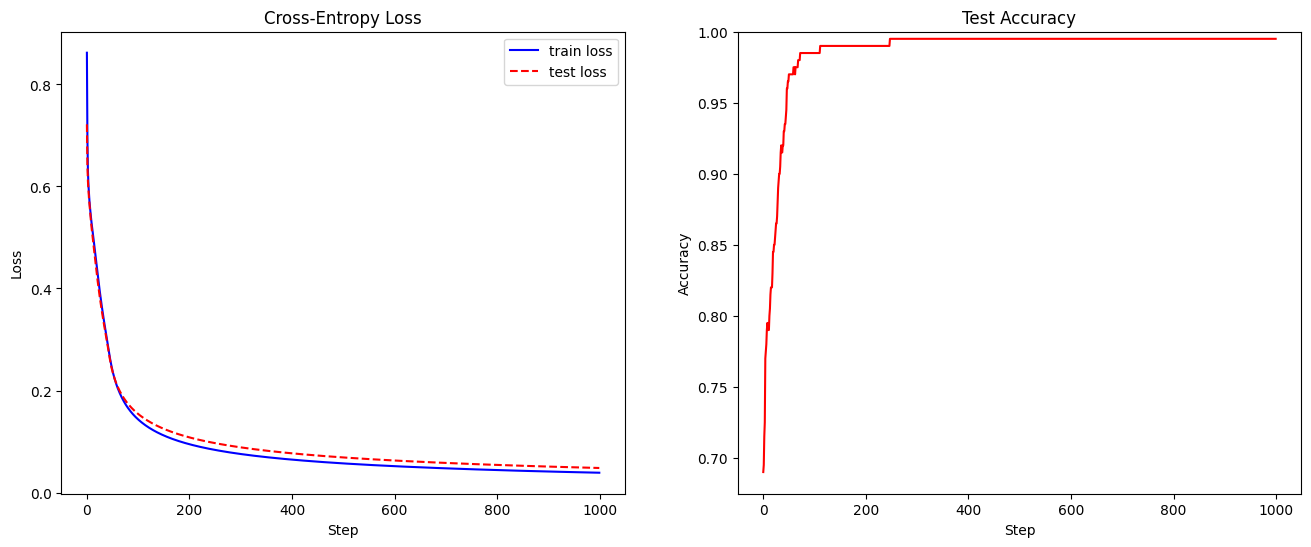

In [ ]:
# 超参数
num_epochs = 1000
learning_rate = 0.1
batch_size = 128
eps=1e-7 # 用于防止除以0、log(0)等数学问题

# 创建一个层大小依次为[2, 4, 1]的多层感知机
# 对于二分类任务，我们用sigmoid作为输出层的激活函数，使其输出在[0,1]之间
mlp = MLP(layer_sizes=[2, 4, 1], use_bias=True, out_activation='sigmoid')

# 训练过程
losses = []
test_losses = []
test_accs = []
for epoch in range(num_epochs):
    # 我们实现的MLP支持批量输入，因此采用SGD算法
    st = 0
    loss = 0.0
    while True:
        ed = min(st + batch_size, len(x_train))
        if st >= ed:
            break
        # 取出batch
        x = x_train[st: ed]
        y = y_train[st: ed]
        # 计算MLP的预测
        y_pred = mlp.forward(x)
        # 计算梯度∂J/∂y 交叉熵损失
        grad = (y_pred - y) / (y_pred * (1 - y_pred) + eps)
        # 反向传播
        mlp.backward(grad)
        # 更新参数
        mlp.update(learning_rate)
        # 计算交叉熵损失
        train_loss = np.sum(-y * np.log(y_pred + eps) \
            - (1 - y) * np.log(1 - y_pred + eps))
        loss += train_loss
        st += batch_size

    losses.append(loss / len(x_train))
    # 计算测试集上的交叉熵和精度
    y_pred = mlp.forward(x_test)
    test_loss = np.sum(-y_test * np.log(y_pred + eps) \
        - (1 - y_test) * np.log(1 - y_pred + eps)) / len(x_test)
    test_acc = np.sum(np.round(y_pred) == y_test) / len(x_test)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
print('测试精度：', test_accs[-1])
# 将损失变化进行可视化
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(losses, color='blue', label='train loss')
plt.plot(test_losses, color='red', ls='--', label='test loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')
plt.legend()

plt.subplot(122)
plt.plot(test_accs, color='red')
plt.ylim(top=1.0)
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()

### torch实现

### 导包

In [2]:
import torch # PyTorch库
import torch.nn as nn # PyTorch中与神经网络相关的工具
from torch.nn.init import normal_ # 正态分布初始化

In [ ]:

torch_activation_dict = {
    'identity': lambda x: x,
    'sigmoid': torch.sigmoid,
    'tanh': torch.tanh,
    'relu': torch.relu
}

# 定义MLP类，基于PyTorch的自定义模块通常都继承nn.Module
# 继承后，只需要实现forward函数，进行前向传播
# 反向传播与梯度计算均由PyTorch自动完成
class MLP_torch(nn.Module):

    def __init__(
        self, 
        layer_sizes, # 包含每层大小的list
        use_bias=True, 
        activation='relu',
        out_activation='identity'
    ):
        super().__init__() # 初始化父类
        self.activation = torch_activation_dict[activation]
        self.out_activation = torch_activation_dict[out_activation]
        self.layers = nn.ModuleList() # ModuleList以列表方式存储PyTorch模块    
        num_in = layer_sizes[0]
        for num_out in layer_sizes[1:]:
            # 创建全连接层
            self.layers.append(nn.Linear(num_in, num_out, bias=use_bias))
            # 正态分布初始化，采用与前面手动实现时相同的方式
            normal_(self.layers[-1].weight, std=1.0)   #使用正态分布对刚刚创建的全连接层(nn.Linear)的权重进行初始化
            # 偏置项为全0
            self.layers[-1].bias.data.fill_(0.0)  #将刚刚创建的全连接层(nn.Linear)的偏置项(bias)初始化为全0。
            num_in = num_out

    def forward(self, x):
        # 前向传播
        # PyTorch可以自行处理batch_size等维度问题
        # 我们只需要让输入依次通过每一层即可
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.activation(x)
        # 输出层
        x = self.layers[-1](x)
        x = self.out_activation(x)
        return x

测试精度： 0.995


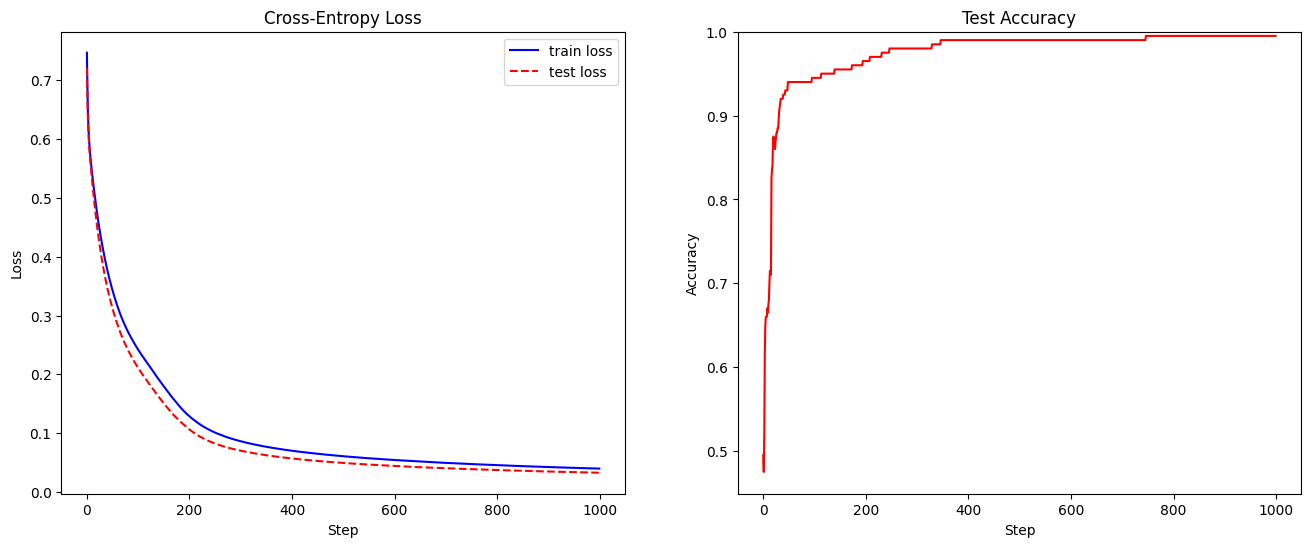

In [ ]:
# 设置超参数
num_epochs = 1000
learning_rate = 0.1
batch_size = 128
eps = 1e-7
torch.manual_seed(0)


#初始化MLP模型
mlp=MLP_torch(layer_sizes=[2,4,1],use_bias=True,out_activation='sigmoid')

#定义SGD优化器
opt=torch.optim.SGD(mlp.parameters(),lr=learning_rate)

#开始训练
losses=[]
test_losses=[]
test_accs=[]

for epoch in range(num_epochs):
  st=0
  loss=[]
  while True:
    ed=min(st+batch_size,len(x_train))
    if(st>=ed):
      break
    #取出batch，转为张量
    x=torch.tensor(x_train[st:ed],dtype=torch.float32)
    y=torch.tensor(y_train[st:ed],dtype=torch.float32).reshape(-1,1)

    #计算MLP预测
    #调用模型，PyTorch会【自动调用】forward方法
    #y_pred的维度为(batch_size,layer_sizes[-1])
    y_pred=mlp(x)
    #计算交叉熵损失
    train_loss=torch.mean(-y*torch.log(y_pred+eps)-(1-y)*torch.log(1-y_pred+eps))
    #清空梯度
    opt.zero_grad()
    #方向传播
    train_loss.backward()
    #更新参数
    opt.step()
    #记录损失，但是需要先把损失张量转为numpy模式
    loss.append(train_loss.detach().numpy())
    st+=batch_size
  
  losses.append(np.mean(loss))
  # 计算测试集上的交叉熵
  # 在不需要梯度的部分，可以用torch.inference_mode()加速计算
  with torch.inference_mode():  #PyTorch 的上下文管理器 torch.inference_mode(),它的主要功能是 优化推理（inference）过程 ，
                                #通过禁用梯度计算和优化某些操作来提高效率并减少内存占用。
    x = torch.tensor(x_test, dtype=torch.float32)
    y = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
    y_pred = mlp(x)
    test_loss = torch.sum(-y * torch.log(y_pred + eps) - (1 - y) * torch.log(1 - y_pred + eps)) / len(x_test)
    test_acc = torch.sum(torch.round(y_pred) == y) / len(x_test)
    test_losses.append(test_loss.detach().numpy())
    test_accs.append(test_acc.detach().numpy())

print('测试精度：', test_accs[-1])
# 将损失变化进行可视化
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(losses, color='blue', label='train loss')
plt.plot(test_losses, color='red', ls='--', label='test loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')
plt.legend()

plt.subplot(122)   #plt.subplot(122)中的122,可以拆解为三个部分 :1表示整个图形被划分为1行 ,2表示整个图形被划分为2列。2表示当前要操作的是第2个子图 。
plt.plot(test_accs, color='red')
plt.ylim(top=1.0)
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()